In [88]:
import pickle
import matplotlib.pyplot as plt
import time
import numpy as np
import cv2
import time

import tensorflow.keras.layers as l
import tensorflow.keras.backend as K

import tensorflow.keras.optimizers as o
import tensorflow.keras.models as m
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical

In [83]:
mnist = keras.datasets.mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = keras.utils.normalize(x_train, axis=1)
x_test = keras.utils.normalize(x_test, axis=1)

x_train = x_train.reshape([-1, 28, 28, 1])
x_test = x_test.reshape([-1, 28, 28, 1])


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

---

## Augmente the Dataset

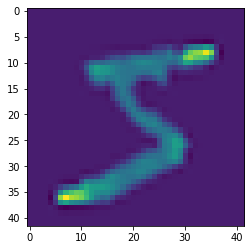

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [84]:
# create rotated image
def rotate_image(image, deggress):
    height, width = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2,height/2), deggress ,1)
    
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    
    plt.imshow(rotated_image)
    plt.show()
    
    return rotated_image

# scale image % of the origina
def scale_image(image, px, py):
    scaled_image = cv2.resize(image, None, fx=px, fy=py, interpolation=cv2.INTER_CUBIC) # INTER_CUBIC # INTER_AREA
    plt.imshow(scaled_image)
    plt.show()
    return scaled_image

#image pyramids using cv2.pyrDown(img) or cv2.pyrUp(img)


scale_image(x_train[0], 1.5, 1.5)

## Make the Network

In [85]:
model = m.Sequential()

model.add(l.Conv2D(49, (3,3), padding='same', activation='relu', input_shape = (28,28,1)))
model.add(l.MaxPooling2D((3,3)))
model.add(l.Conv2D(36, (3,3), padding='same', activation='relu'))
model.add(l.MaxPooling2D((3,3)))

model.add(l.Flatten())
model.add(l.Dense(32, activation="relu"))
model.add(l.Dropout(rate=0.5))
model.add(l.Dense(64, activation="relu"))

model.add(l.Dense(10, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 49)        490       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 49)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 36)          15912     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 36)          0         
_________________________________________________________________
flatten (Flatten)            (None, 324)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                10400     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0

In [92]:
name = "tf_{}.log".format(int(time.time()))
# print(name)
tensorboard = TensorBoard(log_dir='logs/{}'.format(name))

In [94]:
model.fit(x_train, y_train, epochs=10, callbacks=[tensorboard], validation_data = (x_test,y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 339us/sample - loss: 0.1327 - accuracy: 0.9586 - val_loss: 0.0623 - val_accuracy: 0.9816
Epoch 2/10
60000/60000 [==============================] - 21s 349us/sample - loss: 0.1279 - accuracy: 0.9603 - val_loss: 0.0533 - val_accuracy: 0.9836
Epoch 3/10
60000/60000 [==============================] - 22s 365us/sample - loss: 0.1242 - accuracy: 0.9607 - val_loss: 0.0697 - val_accuracy: 0.9809
Epoch 4/10
60000/60000 [==============================] - 22s 361us/sample - loss: 0.1220 - accuracy: 0.9618 - val_loss: 0.0664 - val_accuracy: 0.9807
Epoch 5/10
60000/60000 [==============================] - 21s 355us/sample - loss: 0.1120 - accuracy: 0.9657 - val_loss: 0.0584 - val_accuracy: 0.9829
Epoch 6/10
60000/60000 [==============================] - 20s 336us/sample - loss: 0.1091 - accuracy: 0.9659 - val_loss: 0.0658 - val_accuracy: 0.9825
Epoch 7/10
60000/60000 [====================